In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm.auto import tqdm
import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')
tqdm.pandas()
pd.options.display.max_colwidth = None
sns.set_style('darkgrid')

In [38]:
dtrain = pd.read_csv('/content/train.csv.zip')
print(dtrain.shape)
dtrain.head()

(404290, 6)


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0


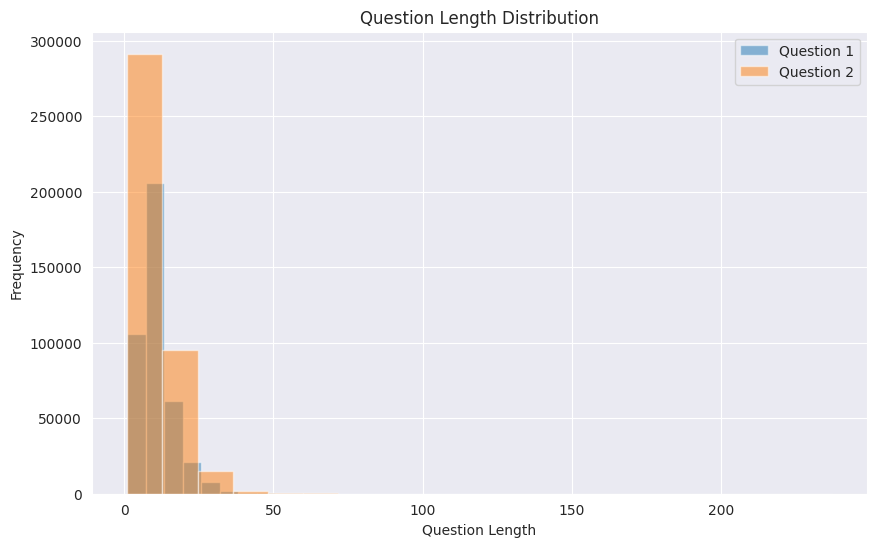

In [39]:
import matplotlib.pyplot as plt

question_lengths1 = dtrain['question1'].apply(lambda x: len(str(x).split()) if not pd.isna(x) else np.nan)
question_lengths2 = dtrain['question2'].apply(lambda x: len(str(x).split()) if not pd.isna(x) else np.nan)

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(question_lengths1.dropna(), bins=20, alpha=0.5, label='Question 1')
plt.hist(question_lengths2.dropna(), bins=20, alpha=0.5, label='Question 2')
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.title('Question Length Distribution')
plt.legend()
plt.show()

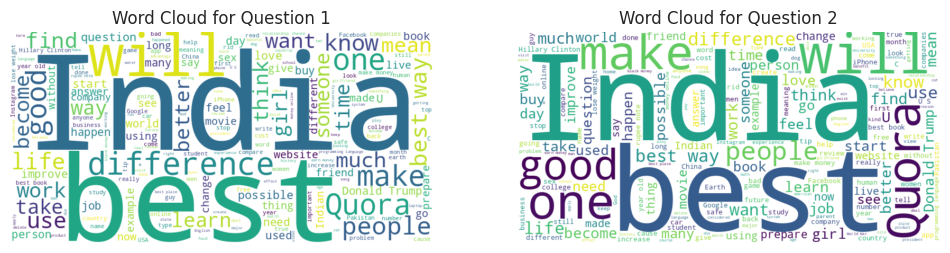

In [40]:

from wordcloud import WordCloud



# Convert NaN values to an empty string and convert values to strings
dtrain['question1'] = dtrain['question1'].fillna('').astype(str)
dtrain['question2'] = dtrain['question2'].fillna('').astype(str)

# Create word clouds for question1
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(' '.join(dtrain['question1']))

# Create word clouds for question2
wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate(' '.join(dtrain['question2']))

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title('Word Cloud for Question 1')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.title ('Word Cloud for Question 2')
plt.axis("off")

plt.show()

In [41]:
def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q


In [42]:
new_df = dtrain.iloc[:5000]
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [43]:
 new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guide to invest in share market in india,what is the step by step guide to invest in share market,0
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government stole the kohinoor koh i noor diamond back,0
2,2,5,6,how can i increase the speed of my internet connection while using a vpn,how can internet speed be increased by hacking through dns,0
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divided by 24 23,0
4,4,9,10,which one dissolve in water quikly sugar salt methane and carbon di oxide,which fish would survive in salt water,0


In [44]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords data (if not already done)
nltk.download('stopwords')

# Define a function to calculate cosine similarity
def calculate_cosine_similarity(row):
    # Tokenize the cleaned text and convert it to a numeric representation
    question1 = word_tokenize(row['question1'])
    question2 = word_tokenize(row['question2'])

    # Set a minimum token count to avoid empty or near-empty documents
    min_tokens = 2  # Adjust as needed

    # Check if both lists have a sufficient number of tokens
    if len(question1) < min_tokens or len(question2) < min_tokens:
        return 0.0  # Return 0 similarity for very short documents

    # Create a TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer()

    # Fit and transform the vectorizer on the tokenized text
    tfidf_matrix = tfidf_vectorizer.fit_transform([row['question1'], row['question2']])

    # Calculate cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])

    return cosine_sim[0][0]

# Apply the calculate_cosine_similarity function to the DataFrame
new_df['cosine_similarity'] =new_df.apply(calculate_cosine_similarity, axis=1)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,cosine_similarity
0,0,1,2,what is the step by step guide to invest in share market in india,what is the step by step guide to invest in share market,0,0.920307
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government stole the kohinoor koh i noor diamond back,0,0.424251
2,2,5,6,how can i increase the speed of my internet connection while using a vpn,how can internet speed be increased by hacking through dns,0,0.225765
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divided by 24 23,0,0.000000
4,4,9,10,which one dissolve in water quikly sugar salt methane and carbon di oxide,which fish would survive in salt water,0,0.272060


In [46]:
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union > 0 else 0  # Handle division by zero

# Apply the Jaccard similarity function to the "question1" and "question2" columns
new_df['jaccard_similarity'] = new_df.apply(lambda row: jaccard_similarity(set(row['question1'].split()), set(row['question2'].split())), axis=1)

In [47]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,cosine_similarity,jaccard_similarity
0,0,1,2,what is the step by step guide to invest in share market in india,what is the step by step guide to invest in share market,0,0.920307,0.916667
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government stole the kohinoor koh i noor diamond back,0,0.424251,0.411765
2,2,5,6,how can i increase the speed of my internet connection while using a vpn,how can internet speed be increased by hacking through dns,0,0.225765,0.200000
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divided by 24 23,0,0.000000,0.000000
4,4,9,10,which one dissolve in water quikly sugar salt methane and carbon di oxide,which fish would survive in salt water,0,0.272060,0.250000


In [48]:
n_df = dtrain.sample(n=5000, random_state=42)

In [49]:
n_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
368101,368101,12736,104117,What are some of the best side dishes for crab cakes?,What are some good side dishes for buffalo chicken?,0
70497,70497,121486,121487,"Which is more advisable and better material for a crash test in automobiles, ductile or brittle?",What is the best server setup for buddypress?,0
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for programming?,1
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1


In [50]:
n_df['question1'] = n_df['question1'].apply(preprocess)
n_df['question2'] = n_df['question2'].apply(preprocess)

In [51]:
n_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0
368101,368101,12736,104117,what are some of the best side dishes for crab cakes,what are some good side dishes for buffalo chicken,0
70497,70497,121486,121487,which is more advisable and better material for a crash test in automobiles ductile or brittle,what is the best server setup for buddypress,0
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for programming,1
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1


In [52]:
n_df['q1_len'] = n_df['question1'].str.len()
n_df['q2_len'] = n_df['question2'].str.len()

In [53]:
n_df['q1_num_words'] = n_df['question1'].apply(lambda row: len(row.split(" ")))
n_df['q2_num_words'] = n_df['question2'].apply(lambda row: len(row.split(" ")))
n_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8
368101,368101,12736,104117,what are some of the best side dishes for crab cakes,what are some good side dishes for buffalo chicken,0,52,50,11,9
70497,70497,121486,121487,which is more advisable and better material for a crash test in automobiles ductile or brittle,what is the best server setup for buddypress,0,95,44,17,8
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for programming,1,43,51,7,9
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7


In [54]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [55]:
n_df['word_common'] = new_df.apply(common_words, axis=1)
n_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,NaN
368101,368101,12736,104117,what are some of the best side dishes for crab cakes,what are some good side dishes for buffalo chicken,0,52,50,11,9,NaN
70497,70497,121486,121487,which is more advisable and better material for a crash test in automobiles ductile or brittle,what is the best server setup for buddypress,0,95,44,17,8,NaN
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for programming,1,43,51,7,9,NaN
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,NaN


In [56]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [57]:
n_df['word_total'] = n_df.apply(total_words, axis=1)
n_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,NaN,16
368101,368101,12736,104117,what are some of the best side dishes for crab cakes,what are some good side dishes for buffalo chicken,0,52,50,11,9,NaN,20
70497,70497,121486,121487,which is more advisable and better material for a crash test in automobiles ductile or brittle,what is the best server setup for buddypress,0,95,44,17,8,NaN,25
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for programming,1,43,51,7,9,NaN,16
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,NaN,16


In [58]:
n_df['word_share'] = round(n_df['word_common']/n_df['word_total'],2)
n_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,NaN,16,NaN
368101,368101,12736,104117,what are some of the best side dishes for crab cakes,what are some good side dishes for buffalo chicken,0,52,50,11,9,NaN,20,NaN
70497,70497,121486,121487,which is more advisable and better material for a crash test in automobiles ductile or brittle,what is the best server setup for buddypress,0,95,44,17,8,NaN,25,NaN
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for programming,1,43,51,7,9,NaN,16,NaN
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,NaN,16,NaN


In [59]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features


In [60]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
token_features = n_df.apply(fetch_token_features, axis=1)

n_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
n_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
n_df["csc_min"]       = list(map(lambda x: x[2], token_features))
n_df["csc_max"]       = list(map(lambda x: x[3], token_features))
n_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
n_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
n_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
n_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [62]:
n_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,...,16,NaN,0.749981,0.749981,0.999975,0.999975,0.874989,0.874989,0,1
368101,368101,12736,104117,what are some of the best side dishes for crab cakes,what are some good side dishes for buffalo chicken,0,52,50,11,9,...,20,NaN,0.399992,0.399992,0.999975,0.666656,0.666659,0.545450,0,1
70497,70497,121486,121487,which is more advisable and better material for a crash test in automobiles ductile or brittle,what is the best server setup for buddypress,0,95,44,17,8,...,25,NaN,0.000000,0.000000,0.499988,0.249997,0.249997,0.124999,0,0
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for programming,1,43,51,7,9,...,16,NaN,0.999975,0.999975,0.666644,0.399992,0.857131,0.666659,0,1
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,...,16,NaN,0.749981,0.599988,0.333322,0.249994,0.571420,0.444440,0,1


In [63]:
from difflib import SequenceMatcher

def fetch_length_features(row):
    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0] * 3

    # Converting the Sentence into Tokens
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    # Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2

    # Using difflib to find longest common substring
    seq_matcher = SequenceMatcher(None, q1, q2)
    match = seq_matcher.find_longest_match(0, len(q1), 0, len(q2))
    longest_common_substring_length = match.size

    length_features[2] = longest_common_substring_length / (min(len(q1), len(q2)) + 1)

    return length_features


In [64]:
length_features = new_df.apply(fetch_length_features, axis=1)

n_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
n_df['mean_len'] = list(map(lambda x: x[1], length_features))
n_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [65]:
!pip install fuzzywuzzy

In [66]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [67]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
n_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
n_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
n_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
n_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [68]:
print(new_df.shape)
n_df.head()

(5000, 8)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,...,0.874989,0,1,2.0,13.0,0.982456,93,100,93,100
368101,368101,12736,104117,what are some of the best side dishes for crab cakes,what are some good side dishes for buffalo chicken,0,52,50,11,9,...,0.545450,0,1,5.0,12.5,0.588235,66,74,63,86
70497,70497,121486,121487,which is more advisable and better material for a crash test in automobiles ductile or brittle,what is the best server setup for buddypress,0,95,44,17,8,...,0.124999,0,0,4.0,12.0,0.169492,43,46,63,63
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for programming,1,43,51,7,9,...,0.666659,0,1,1.0,11.5,0.040000,9,11,25,28
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,...,0.444440,0,1,6.0,10.0,0.153846,35,55,47,67


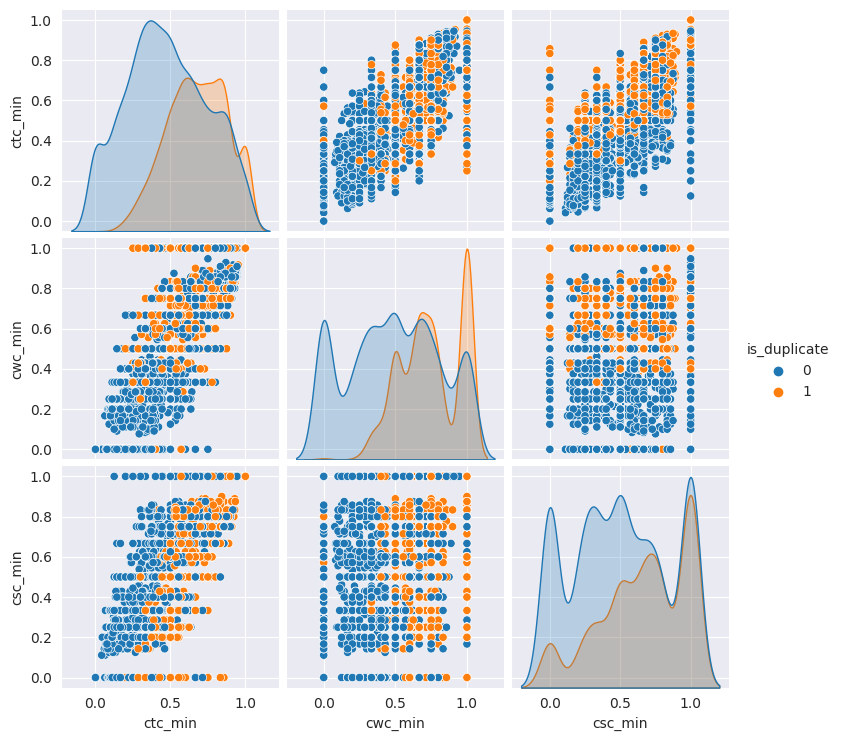

In [70]:
sns.pairplot(n_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

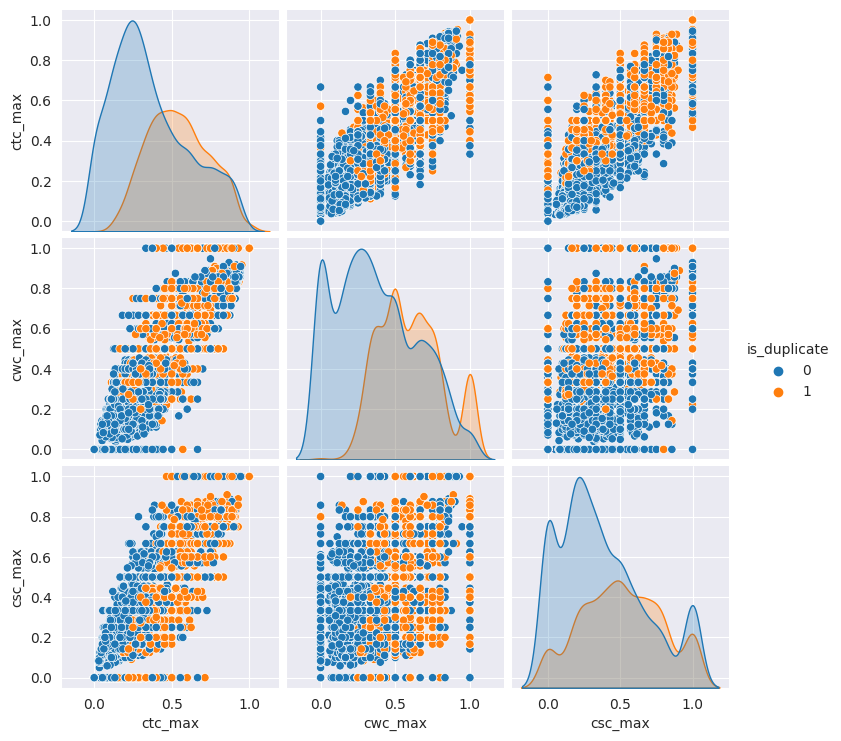

In [71]:
sns.pairplot(n_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

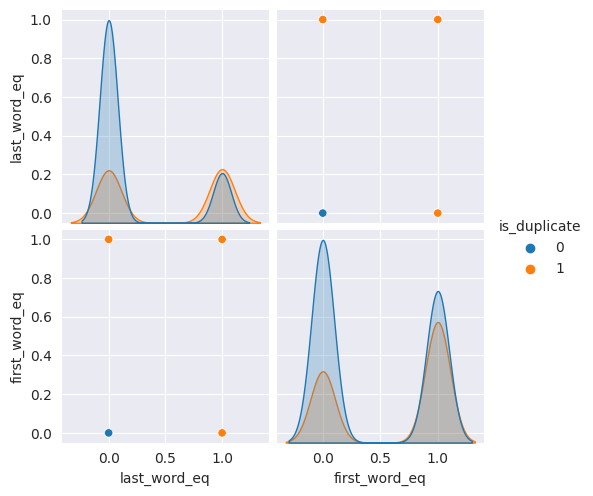

In [72]:
sns.pairplot(n_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Flatten, Dense, Input, concatenate

# Load your dataset (assuming you have already loaded and preprocessed it)

# Preprocessed sentence pairs
sentences1 = new_df['question1']
sentences2 = new_df['question2']

# Labels (is_duplicate)
labels = new_df['is_duplicate']

# Split the data into training and validation sets
sentences1_train, sentences1_valid, sentences2_train, sentences2_valid, labels_train, labels_valid = train_test_split(
    sentences1, sentences2, labels, test_size=0.2, random_state=42
)

# Create a vocabulary based on your sentences
vocab = set(' '.join(sentences1 + sentences2).split())

# Define the maximum sequence length and vocabulary size
max_sequence_length = 20  # You can choose an appropriate value
vocab_size = len(vocab)

# Create a word-to-index dictionary
word_to_index = {word: index for index, word in enumerate(vocab)}
index_to_word = {index: word for word, index in word_to_index.items()}

# Convert sentences to sequences of word indices
def sentence_to_indices(sentence, word_to_index, max_length):
    words = sentence.split()
    indices = [word_to_index[word] for word in words if word in word_to_index]
    # Pad or truncate the sequence to the specified max_length
    if len(indices) < max_length:
        indices = indices + [0] * (max_length - len(indices))
    else:
        indices = indices[:max_length]
    return indices

sentences1_train_indices = np.array([sentence_to_indices(sentence, word_to_index, max_sequence_length) for sentence in sentences1_train])
sentences2_train_indices = np.array([sentence_to_indices(sentence, word_to_index, max_sequence_length) for sentence in sentences2_train])

# Create a simple neural network model
input1 = Input(shape=(max_sequence_length,))
input2 = Input(shape=(max_sequence_length,))

embedding_layer = Embedding(input_dim=vocab_size, output_dim=100, input_length=max_sequence_length)
embedding1 = embedding_layer(input1)
embedding2 = embedding_layer(input2)

flatten1 = Flatten()(embedding1)
flatten2 = Flatten()(embedding2)

concatenated = concatenate([flatten1, flatten2])

dense_layer1 = Dense(128, activation='relu')(concatenated)
output_layer = Dense(1, activation='sigmoid')(dense_layer1)

model = Model(inputs=[input1, input2], outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit([sentences1_train_indices, sentences2_train_indices], labels_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the validation set
sentences1_valid_indices = np.array([sentence_to_indices(sentence, word_to_index, max_sequence_length) for sentence in sentences1_valid])
sentences2_valid_indices = np.array([sentence_to_indices(sentence, word_to_index, max_sequence_length) for sentence in sentences2_valid])

accuracy = model.evaluate([sentences1_valid_indices, sentences2_valid_indices], labels_valid)[1]
print(f'Validation Accuracy: {accuracy}')


Epoch 1/10
100/100 [==============================] - 20s 134ms/step - loss: 0.6519 - accuracy: 0.6216 - val_loss: 0.6155 - val_accuracy: 0.6650
Epoch 2/10
100/100 [==============================] - 4s 42ms/step - loss: 0.4042 - accuracy: 0.8347 - val_loss: 0.6632 - val_accuracy: 0.6662
Epoch 3/10
100/100 [==============================] - 1s 12ms/step - loss: 0.0690 - accuracy: 0.9866 - val_loss: 0.8888 - val_accuracy: 0.6288
Epoch 4/10
100/100 [==============================] - 1s 12ms/step - loss: 0.0139 - accuracy: 0.9972 - val_loss: 0.9317 - val_accuracy: 0.6575
Epoch 5/10
100/100 [==============================] - 2s 21ms/step - loss: 0.0052 - accuracy: 0.9994 - val_loss: 1.0182 - val_accuracy: 0.6413
Epoch 6/10
100/100 [==============================] - 2s 16ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.0608 - val_accuracy: 0.6475
Epoch 7/10
100/100 [==============================] - 1s 13ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.1017 - val_accuracy: 0.63

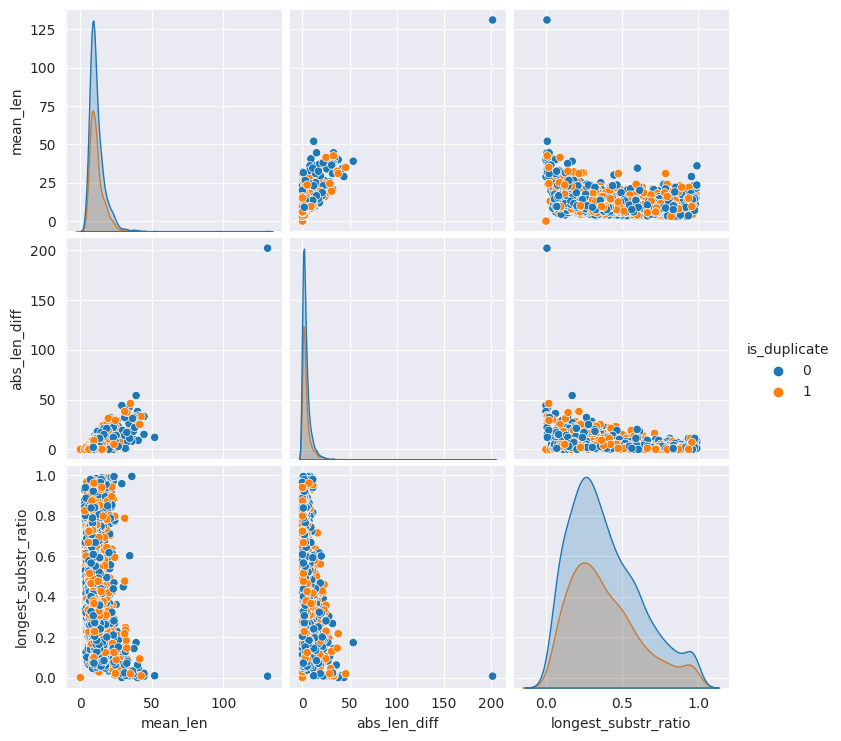

In [74]:
sns.pairplot(n_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

In [76]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(n_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = n_df['is_duplicate'].values
n_df.shape

(5000, 28)

In [77]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.015s...
[t-SNE] Computed neighbors for 5000 samples in 0.628s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.174992
[t-SNE] Computed conditional probabilities in 0.222s
[t-SNE] Iteration 50: error = 87.6110077, gradient norm = 0.0849798 (50 iterations in 6.415s)
[t-SNE] Iteration 100: error = 74.5162048, gradient norm = 0.0144732 (50 iterations in 2.451s)
[t-SNE] Iteration 150: error = 72.3104858, gradient norm = 0.0074288 (50 iterations in 1.841s)
[t-SNE] Iteration 200: error = 71.5295334, gradient norm = 0.0050721 (50 iterations in 1.764s)
[t-SNE] Iteration 250: error = 71.1092682, gradient norm = 0.0039488

In [78]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.013s...
[t-SNE] Computed neighbors for 5000 samples in 0.653s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.174992
[t-SNE] Computed conditional probabilities in 0.268s
[t-SNE] Iteration 50: error = 88.1218262, gradient norm = 0.0607964 (50 iterations in 12.322s)
[t-SNE] Iteration 100: error = 72.8814850, gradient norm = 0.0083565 (50 iterations in 8.205s)
[t-SNE] Iteration 150: error = 71.3153229, gradient norm = 0.0036339 (50 iterations in 4.746s)
[t-SNE] Iteration 200: error = 70.7683868, gradient norm = 0.0024577 (50 iterations in 6.349s)
[t-SNE] Iteration 250: error = 70.4658813, gradient norm = 0.001897

In [79]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [80]:
ques_df = n_df[['question1','question2']]
ques_df.head()

,question1,question2
8067,how do i play pokémon go in korea,how do i play pokémon go in china
368101,what are some of the best side dishes for crab cakes,what are some good side dishes for buffalo chicken
70497,which is more advisable and better material for a crash test in automobiles ductile or brittle,what is the best server setup for buddypress
226567,how do i improve logical programming skills,how can i improve my logical skills for programming
73186,how close we are to see 3rd world war,how close is a world war iii


In [81]:
final_df = n_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(5000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
8067,0,33,33,8,8,NaN,16,NaN,0.749981,0.749981,...,0.874989,0,1,2.0,13.0,0.982456,93,100,93,100
368101,0,52,50,11,9,NaN,20,NaN,0.399992,0.399992,...,0.545450,0,1,5.0,12.5,0.588235,66,74,63,86
70497,0,95,44,17,8,NaN,25,NaN,0.000000,0.000000,...,0.124999,0,0,4.0,12.0,0.169492,43,46,63,63
226567,1,43,51,7,9,NaN,16,NaN,0.999975,0.999975,...,0.666659,0,1,1.0,11.5,0.040000,9,11,25,28
73186,1,37,28,9,7,NaN,16,NaN,0.749981,0.599988,...,0.444440,0,1,6.0,10.0,0.153846,35,55,47,67


In [82]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [83]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(5000, 6000)

In [84]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(5000, 6023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
8067,0,33,33,8,8,NaN,16,NaN,0.749981,0.749981,...,0,0,0,0,0,0,0,0,0,0
368101,0,52,50,11,9,NaN,20,NaN,0.399992,0.399992,...,0,0,0,0,0,0,0,0,0,0
70497,0,95,44,17,8,NaN,25,NaN,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
226567,1,43,51,7,9,NaN,16,NaN,0.999975,0.999975,...,0,0,0,0,0,0,0,0,0,0
73186,1,37,28,9,7,NaN,16,NaN,0.749981,0.599988,...,0,0,0,0,0,0,0,0,0,0


In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [89]:
# Drop rows with missing values in both X_train and X_test
import numpy as np

# Replace NaN with a specific value (e.g., mean of the column)
X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train))
X_test = np.nan_to_num(X_test, nan=np.nanmean(X_test))


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.757

In [90]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.77

In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[556,  75],
       [168, 201]])

In [93]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return len(w1 & w2)

In [94]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return (len(w1) + len(w2))

In [95]:
def test_fetch_token_features(q1,q2):

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features


In [96]:
from difflib import SequenceMatcher

def test_fetch_length_features(q1, q2):
    length_features = [0.0] * 3

    # Converting the Sentence into Tokens
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    # Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2

    # Using difflib to find longest common substring
    seq_matcher = SequenceMatcher(None, q1, q2)
    match = seq_matcher.find_longest_match(0, len(q1), 0, len(q2))
    longest_common_substring_length = match.size

    length_features[2] = longest_common_substring_length / (min(len(q1), len(q2)) + 1)

    return length_features


In [97]:
def test_fetch_fuzzy_features(q1,q2):

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [98]:
def query_point_creator(q1,q2):

    input_query = []

    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)

    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))

    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))

    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))

    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)

    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)

    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)

    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()

    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()



    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [99]:
nn_df = dtrain.sample(n=10000, random_state=42)

In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Concatenate, Input
from keras.models import Model

# Assuming you have a DataFrame with columns 'qid1', 'qid2', 'question1', 'question2', and 'is_duplicate'
# Replace this with your actual data


# Combine both question columns for Word2Vec training
combined_questions = nn_df['question1'].append(nn_df['question2']).values

# Tokenize and train Word2Vec model
tokenizer = Tokenizer()
tokenizer.fit_on_texts(combined_questions)
word_index = tokenizer.word_index

# Convert sentences to sequences
sequences_q1 = tokenizer.texts_to_sequences(nn_df['question1'])
sequences_q2 = tokenizer.texts_to_sequences(nn_df['question2'])

# Pad sequences to make them of equal length
max_len = max(max(len(seq) for seq in sequences_q1), max(len(seq) for seq in sequences_q2))
padded_q1 = pad_sequences(sequences_q1, maxlen=max_len)
padded_q2 = pad_sequences(sequences_q2, maxlen=max_len)

# Build Word2Vec model
word2vec_model = Word2Vec(sentences=combined_questions, vector_size=100, window=5, min_count=1, workers=4)

# Function to get the embedding matrix
def get_embedding_matrix(word_index, word2vec_model):
    embedding_matrix = np.zeros((len(word_index) + 1, word2vec_model.vector_size))
    for word, i in word_index.items():
        if word in word2vec_model.wv:
            embedding_matrix[i] = word2vec_model.wv[word]
    return embedding_matrix

embedding_matrix = get_embedding_matrix(word_index, word2vec_model)

# Create an input layer for each question
input_q1 = Input(shape=(max_len,))
input_q2 = Input(shape=(max_len,))

# Embedding layer for each question
embedding_q1 = Embedding(input_dim=len(word_index) + 1, output_dim=word2vec_model.vector_size, weights=[embedding_matrix], input_length=max_len, trainable=False)(input_q1)
embedding_q2 = Embedding(input_dim=len(word_index) + 1, output_dim=word2vec_model.vector_size, weights=[embedding_matrix], input_length=max_len, trainable=False)(input_q2)

# LSTM layer for each question
lstm_q1 = LSTM(100, return_sequences=True)(embedding_q1)
lstm_q2 = LSTM(100, return_sequences=True)(embedding_q2)

# Concatenate the LSTM outputs
concatenated = Concatenate(axis=-1)([lstm_q1, lstm_q2])

# More LSTM layers if needed
lstm_combined = LSTM(50, return_sequences=True)(concatenated)
lstm_combined = LSTM(25)(lstm_combined)

# Dense layer
output = Dense(1, activation='sigmoid')(lstm_combined)

# Create the model
model = Model(inputs=[input_q1, input_q2], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split the data into training and testing sets
X_train_q1, X_test_q1, X_train_q2, X_test_q2, y_train, y_test = train_test_split(padded_q1, padded_q2, nn_df['is_duplicate'].values, test_size=0.2, random_state=42)

# Train the model
model.fit([X_train_q1, X_train_q2], y_train, epochs=10, batch_size=1, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate([X_test_q1, X_test_q2], y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/10
8000/8000 [==============================] - 160s 19ms/step - loss: 0.6610 - accuracy: 0.6308
Epoch 2/10
8000/8000 [==============================] - 153s 19ms/step - loss: 0.6590 - accuracy: 0.6310
Epoch 3/10
8000/8000 [==============================] - 151s 19ms/step - loss: 0.6575 - accuracy: 0.6310
Epoch 4/10
8000/8000 [==============================] - 151s 19ms/step - loss: 0.6571 - accuracy: 0.6310
Epoch 5/10
8000/8000 [==============================] - 153s 19ms/step - loss: 0.6591 - accuracy: 0.6310
Epoch 6/10
8000/8000 [==============================] - 152s 19ms/step - loss: 0.6592 - accuracy: 0.6310
Epoch 7/10
8000/8000 [==============================] - 152s 19ms/step - loss: 0.6595 - accuracy: 0.6310
Epoch 8/10
8000/8000 [==============================] - 154s 19ms/step - loss: 0.6545 - accuracy: 0.6310
Epoch 9/10
8000/8000 [==============================] - 159s 20ms/step - loss: 0.6588 - accuracy: 0.6310
Epoch 10/10
63/63 [==============================] - 3s